## Predicting heart disease


we're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

In [1]:
pip install --upgrade scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 3.6 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3
Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve # note: this was changed in Scikit-Learn 1.2+ to be "RocCurveDisplay" (see below)
from sklearn.metrics import RocCurveDisplay # new in Scikit-Learn 1.2+

# Print last updated
import time
print(f"Last updated: {time.asctime()}")

Last updated: Fri Apr 26 11:42:40 2024


In [4]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## data exploration

the goal here is to findput more about the data and become a subject matter expert on the dataset you are working

In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

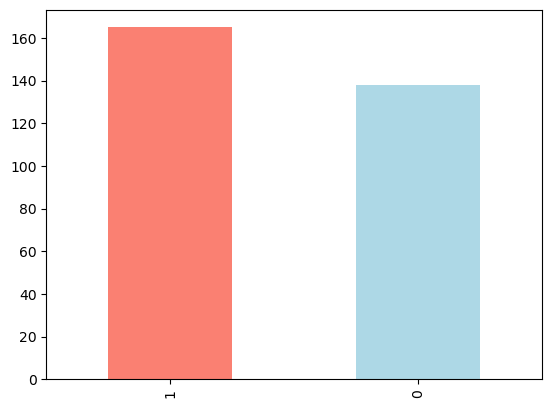

In [6]:
df['target'].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#check for missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### heart disease frequency according to sex 

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# compare target column with the sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


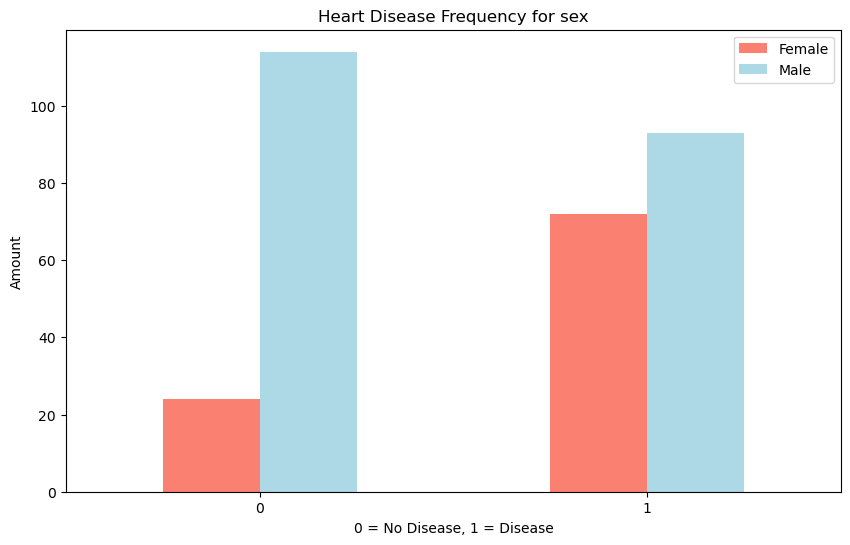

In [12]:
#create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [13]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs. Max Heart Rate 

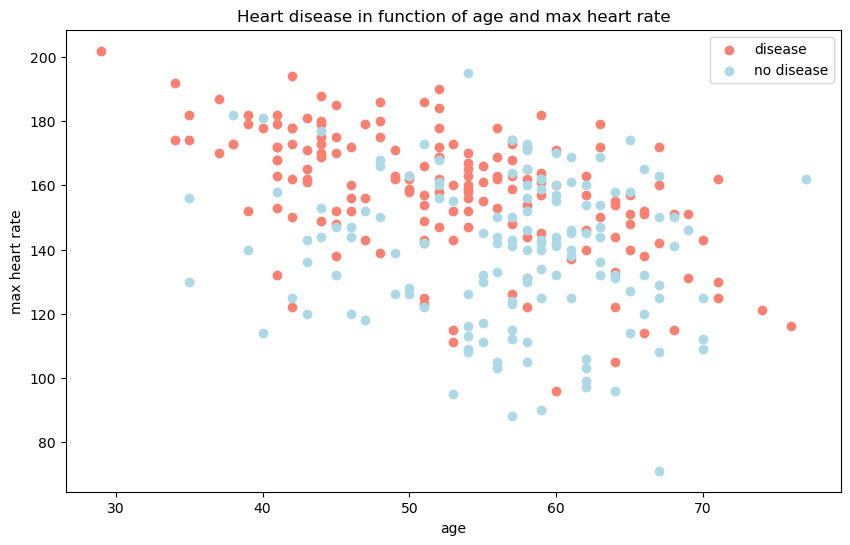

In [14]:
# carete another figure
plt.figure(figsize=(10, 6))

#scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")
# scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

#add some helpful info
plt.title("Heart disease in function of age and max heart rate")
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.legend(["disease", "no disease"])

<Axes: ylabel='Frequency'>

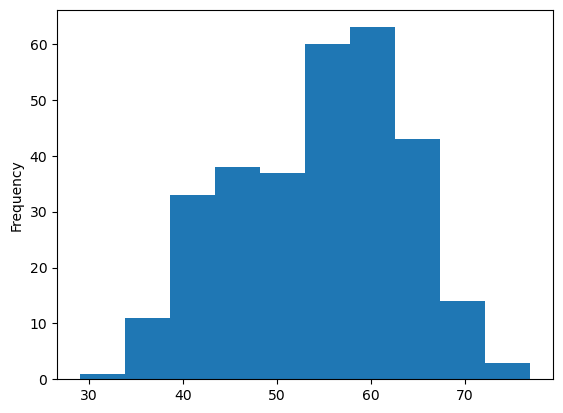

In [15]:
# check the distribution of the age column with a histogram
df.age.plot.hist()

In [16]:
#heart disease frequency per chest pain type

pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

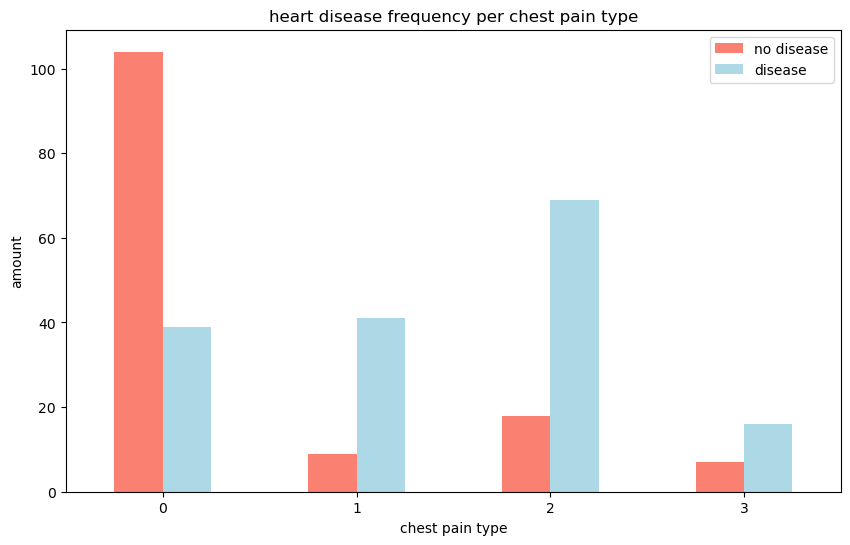

In [17]:
#make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon", "lightblue"])

# add some communication
plt.title("heart disease frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["no disease", "disease"])
plt.xticks(rotation=0)

In [18]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


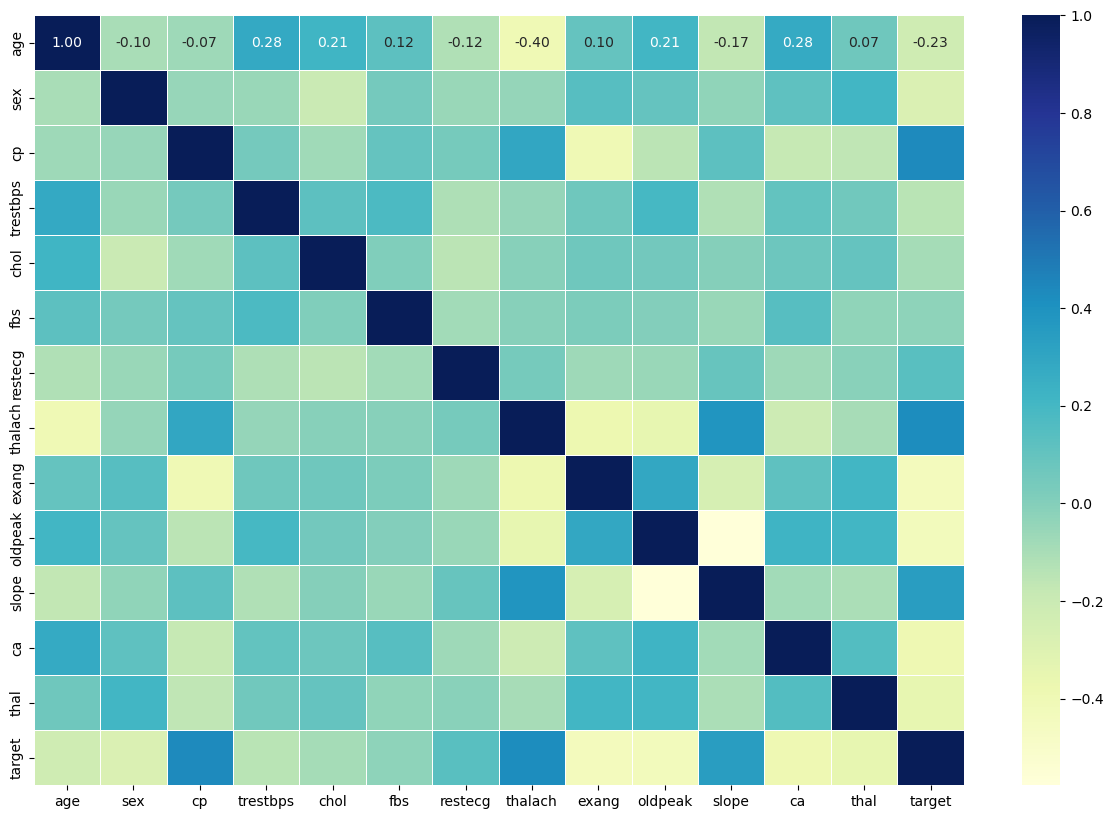

In [23]:
# lets make pur coorelation matrix a little prettier
# getting error , really don't know why!! 
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

## modeling


In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
# split data into x and y

x =df.drop("target", axis=1)
y= df["target"]

In [26]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [28]:
#split data into train and test sets
np.random.seed(42)

#split into train & test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

In [29]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


now its time to build our ml model
we'll train it(find the patterns) on the trainig set.
and we'll test it(use the patterns) on the test set.

we are going to try 3 diffrent machine learning models:
1. logistic regression
2. k-nearest neighbors classifier
3. random forest classifier

In [30]:
# put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    fits and evaluates given machine learning models.
    models : a dict of diffrent scikit-learn machine learning models
    x_train : training data (no labels)
    x_test : testing data
    y_train : training labels
    y_test : test labels
    """
    #set random seed
    np.random.seed(42)
    # make a dictionary to kep model scores
    model_scores = {}
    #loop throough the models
    for name, model in models.items():
        #fit the model to the data
        model.fit(x_train, y_train)
        #evaluate the model and append its score to model_score
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [31]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train= y_train,
                            y_test=y_test)
model_scores

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

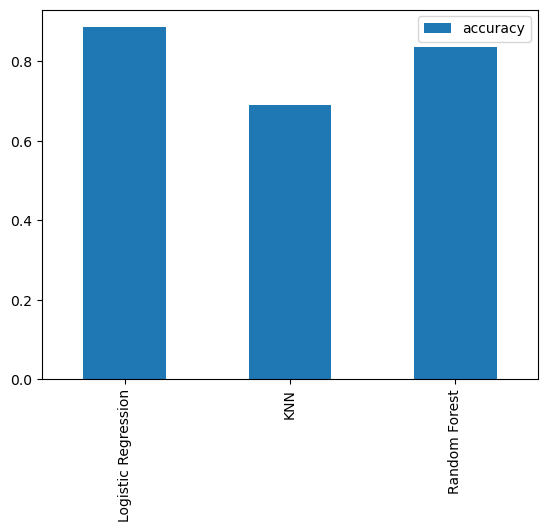

In [32]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

now we've got a baseline model... and we know a model's first prediction are'nt always what we should based our next steps off. what should we do? 

lets look at the following:
1. hyper parameter tuning
2. feature importance
3. confusion matrix
4. cross_validation
5. precision
6. recall
7. f1 score
8. classification report
9. roc curve
10. area under the curve (auc)

### hyperparameter tuning

In [33]:
#lets tune KNN

train_scores = []
test_scores = []

#create a list of different values for n_neighbors
neighbors = range(1, 21)

#setup KNN instances
knn = KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm
    knn.fit(x_train, y_train)
    
    #update the training score list
    train_scores.append(knn.score(x_train, y_train))
    
    #update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [34]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [35]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum KNN score on the test data: 75.41%


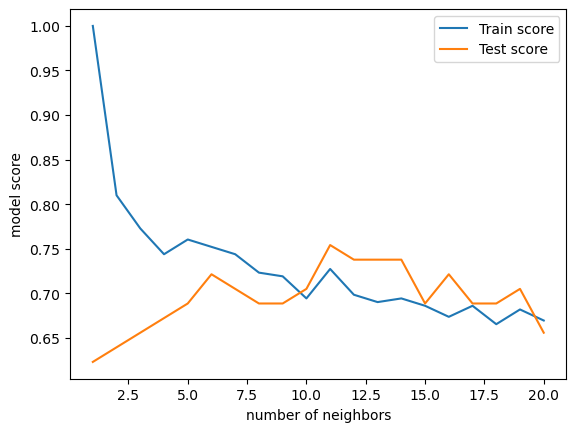

In [36]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("number of neighbors")
plt.ylabel("model score")
plt.legend()

print(f"maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [37]:
#hyeperparameterntuning with randomizesearchcv

#create a hyperparameter grid for logisticregression
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

#create a hyperparameter grid for randomforestclassfier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,20, 2),
          "min_samples_leaf" : np.arange(1, 20, 2)}

now we've got hyperparameter grids setup for each our models. lets tune them using randomizedsearchcv

In [38]:
# tune logisticregression
np.random.seed(42)
    
# setup random heyperparameter search for logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [40]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

now we've tuned Logisticregression(), lets do the same for randomforestclassifier

In [41]:
#setup random seed
np.random.seed(42)

#setup random hyperparameter search for randomforestclassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

#fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
# find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [38]:
#evaluate the randomized search randomforestclassifier model
rs_rf.score(x_test, y_test)

0.8688524590163934

In [39]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### hyperparameter Tuning with GridsearchCV

Since our logisticregression model provides the best score so far, we'll try and improve them again using GridsearchCV..

In [40]:
# different hyperparameters for our logisticregression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

#setup grid hyperparameter search for logisticregression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

#Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [41]:
#check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
#evaluate the grid search logisticregression model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [43]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### evluating our tuned machine learning classifier, beyond accuracy

* Roc curve and AUC score
* confusion matrix
* classification report
* precision
* recall
* f1_score

and it would be great if we cross_validation was used where possible

To make comparison and evluate our trained model, first we need to make prediction

In [44]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [45]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [46]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


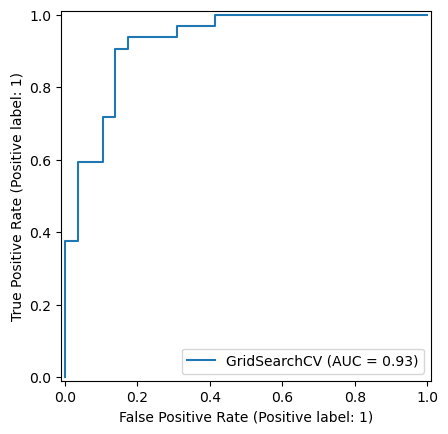

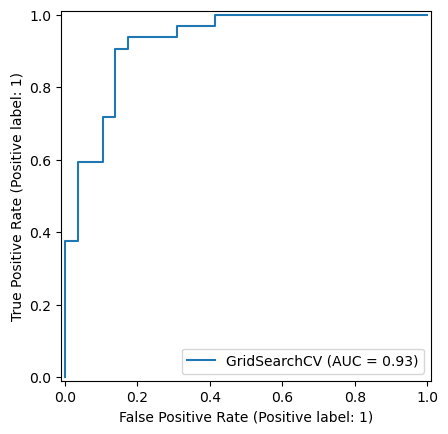

In [48]:
from sklearn.metrics import RocCurveDisplay

# Assuming gs_log_reg is your trained logistic regression model
# x_test and y_test are your test data
roc_display = RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)
roc_display.plot()
plt.show()


In [49]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


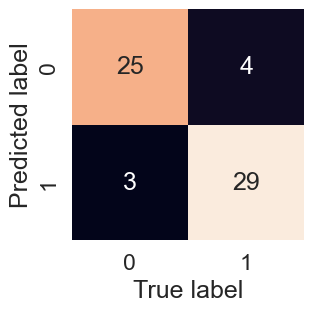

In [50]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    plot a nice looking confusion matrix using seaborn
    """
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot= True,
                    cbar= False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

now we've got a ROC curve, an auc metric and a confusion matrix, lets get a classifiication report as well as cross_validation precision, recall and f1_score.

In [51]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation metrics using cross_validation

we're going to calculate precision, recall and f1_score of our model using cross_validation and to do so we'll be using cross_val_score().

In [52]:
#check best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [54]:
# create new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver= "liblinear")


In [55]:
# cross_validated accuracy

cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [56]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [57]:
#cross_validated precision

cv_precision = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [58]:
#cross_validated recall
cv_recall = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [59]:
#cross_validated f1_score
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

<Axes: title={'center': 'cross_validated classification matrice'}>

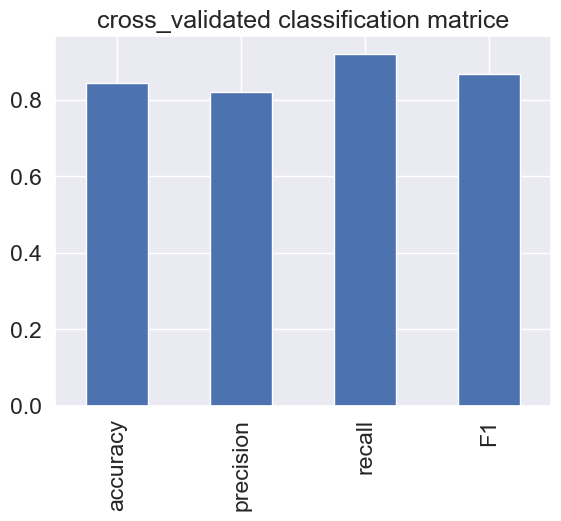

In [62]:
# visualize cross_validated matrices
cv_metrics= pd.DataFrame({"accuracy": cv_acc,
                         "precision": cv_precision,
                         "recall": cv_recall,
                         "F1": cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title="cross_validated classification matrice",
                      legend= False)

### feature importance
feature importance is another as asking, "which feature contributed most to the outcome of the model and how did they contribute?"
one way to find feature importance is to search for("MODEL NAME") feature impoprtance.

In [63]:
#fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                        solver= "liblinear")
clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [64]:
#check coef
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609897, -0.67663372]])

In [65]:
#match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672800489608455,
 'sex': -0.8604464974271708,
 'cp': 0.6606704082728109,
 'trestbps': -0.01156993196274824,
 'chol': -0.0016637440923087717,
 'fbs': 0.04386107313075342,
 'restecg': 0.3127584615862929,
 'thalach': 0.02459361332045646,
 'exang': -0.6041307948760266,
 'oldpeak': -0.568628039197438,
 'slope': 0.4505162753782247,
 'ca': -0.636098965095586,
 'thal': -0.6766337239240338}

<Axes: title={'center': 'Feature Importance'}>

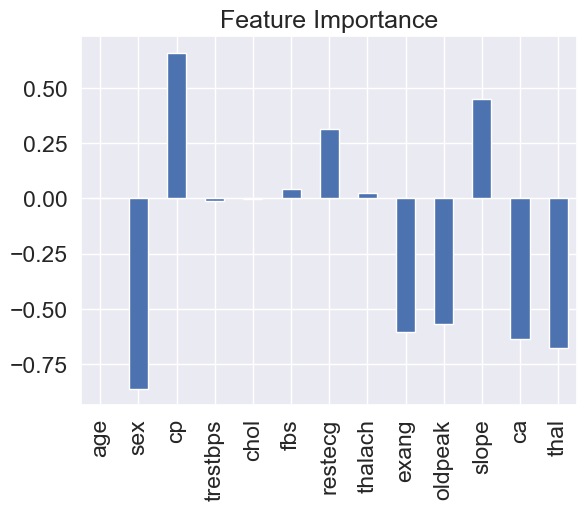

In [66]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [67]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [68]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [33]:
import numpy as np
import networkx as nx
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from spektral.layers import GraphConv

# Generate a sample patient data graph (replace with your actual data)
adjacency_matrix = np.array([[0, 1, 1, 0],
                              [1, 0, 0, 1],
                              [1, 0, 0, 1],
                              [0, 1, 1, 0]])

# Convert the adjacency matrix to a networkx graph
graph = nx.from_numpy_matrix(adjacency_matrix)

# Define the GCN model
class GCN(Model):
    def __init__(self, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(16, 'relu')
        self.conv2 = GraphConv(32, 'relu')
        self.fc = Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x, a = inputs
        x = self.conv1([x, a])
        x = self.conv2([x, a])
        x = tf.reduce_mean(x, axis=1)  # Global pooling
        return self.fc(x)

# Define model parameters
num_classes = 2
num_features = 4  # Number of features per patient
learning_rate = 0.01
epochs = 100

# Initialize and compile the model
model = GCN(num_classes)
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Generate dummy features for each node (replace with your actual features)
node_features = np.random.randn(graph.number_of_nodes(), num_features)

# Generate the adjacency matrix in sparse format
adjacency_matrix_sparse = nx.to_scipy_sparse_matrix(graph)

# Train the model
model.fit([node_features, adjacency_matrix_sparse], labels, epochs=epochs, validation_split=0.1)


ImportError: cannot import name 'GraphConv' from 'spektral.layers' (/Users/sadafmahmoudimeymand/anaconda3/lib/python3.11/site-packages/spektral/layers/__init__.py)

In [16]:
pip install spektral

  Obtaining dependency information for spektral from https://files.pythonhosted.org/packages/ae/4c/b1149deb49c48d58bfc2b68fe6fc502d6c896c69eaf9997de45ad24b6fca/spektral-1.3.1-py3-none-any.whl.metadata


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 1.1 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
import networkx as nx
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from spektral.layers.convolutional import GraphConv
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


# Generate a sample patient data graph (replace with your actual data)
adjacency_matrix = np.array([[0, 1, 1, 0],
                              [1, 0, 0, 1],
                              [1, 0, 0, 1],
                              [0, 1, 1, 0]])

# Convert the adjacency matrix to a networkx graph
graph = nx.from_numpy_matrix(adjacency_matrix)

# Define the GCN model
class GCN(Model):
    def __init__(self, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(16, 'relu')
        self.conv2 = GraphConv(32, 'relu')
        self.fc = Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x, a = inputs
        x = self.conv1([x, a])
        x = self.conv2([x, a])
        x = tf.reduce_mean(x, axis=1)  # Global pooling
        return self.fc(x)

# Define model parameters
num_classes = 2
num_features = 4  # Number of features per patient
learning_rate = 0.01
epochs = 100

# Initialize and compile the model
model = GCN(num_classes)
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Generate dummy features for each node (replace with your actual features)
node_features = np.random.randn(graph.number_of_nodes(), num_features)

# Generate the adjacency matrix in sparse format
adjacency_matrix_sparse = nx.to_scipy_sparse_matrix(graph)

# Train the model
model.fit([node_features, adjacency_matrix_sparse], labels, epochs=epochs, validation_split=0.1)


ImportError: cannot import name 'GraphConv' from 'spektral.layers.convolutional' (/Users/sadafmahmoudimeymand/anaconda3/lib/python3.11/site-packages/spektral/layers/convolutional/__init__.py)

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow_addons.layers import GraphConvolution

# Define the GCN model
class GCN(Model):
    def __init__(self, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConvolution(16, activation='relu')
        self.conv2 = GraphConvolution(32, activation='relu')
        self.fc = Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x, a = inputs
        x = self.conv1([x, a])
        x = self.conv2([x, a])
        x = tf.reduce_mean(x, axis=1)  # Global pooling
        return self.fc(x)

# Define model parameters
num_classes = 2
num_features = 4  # Number of features per patient
learning_rate = 0.01
epochs = 100

# Initialize and compile the model
model = GCN(num_classes)
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Generate dummy features and adjacency matrix for each patient (replace with your actual data)
node_features = np.random.randn(num_samples, num_features)
adjacency_matrix = np.random.randint(0, 2, size=(num_samples, num_samples))

# Train the model
model.fit([node_features, adjacency_matrix], labels, epochs=epochs, validation_split=0.1)


ModuleNotFoundError: No module named 'tensorflow_addons'

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# Define the GCN model
class GCN(nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.fc = nn.Linear(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = x.mean(dim=0)  # Global pooling
        x = self.fc(x)
        return F.softmax(x, dim=-1)

# Define model parameters
num_features = 4  # Number of features per patient
hidden_channels = 64
num_classes = 2

# Initialize the model
model = GCN(num_features, hidden_channels, num_classes)

# Generate dummy features and edge indices for each patient (replace with your actual data)
x = torch.randn(num_samples, num_features)  # Features matrix
edge_index = ...  # Edge indices representing relationships between patients

# Convert edge_index to COO format if necessary
if not isinstance(edge_index, torch.Tensor):
    edge_index = torch.tensor(edge_index, dtype=torch.long)

# Train the model
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

for epoch in range(num_epochs):
    optimizer.zero_grad()
    out = model(x, edge_index)
    loss = criterion(out, labels)
    loss.backward()
    optimizer.step()


ModuleNotFoundError: No module named 'torch'